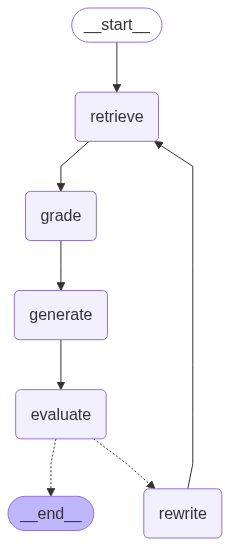

c:\Users\SYED REJAUL KARIM\S2\AI Project\Langgraph_Architecture\.venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


In [7]:
import os
from typing import TypedDict
from dotenv import load_dotenv
from modules.retriever import Retriever
from modules.grader import Grader
from modules.generator import Generator
from modules.rewriter import Rewriter
from modules.evaluator import Evaluator
from IPython.display import Image, display
from langgraph.graph import StateGraph, END

load_dotenv()
class PortfolioState(TypedDict):

    query: str

    retrieved: list

    score: float

    answer: str



 
# Load knowledge base
with open("data/knowledge_base.txt") as f:
    docs = f.readlines()

retriever = Retriever(docs)
grader = Grader()
generator = Generator()
rewriter = Rewriter()
evaluator = Evaluator()

def retrieve_node(state):
    query = state["query"]
    retrieved = retriever.retrieve(query)
    return {"query": query, "retrieved": retrieved}

def grade_node(state):
    score = grader.grade(state["retrieved"])
    return {"query": state["query"], "retrieved": state["retrieved"], "score": score}

def generate_node(state):
    answer = generator.generate(state["retrieved"], state["query"])
    return {"query": state["query"], "retrieved": state["retrieved"], "score": state["score"], "answer": answer}

def evaluate_node(state):
    if evaluator.is_answered(state["answer"]):
        return END
    return "rewrite"

def rewrite_node(state):
    new_query = rewriter.rewrite(state["query"])
    return {"query": new_query}

# Build LangGraph
builder = StateGraph(PortfolioState)
builder.add_node("retrieve", retrieve_node)
builder.add_node("grade", grade_node)
builder.add_node("generate", generate_node)
builder.add_node("evaluate", evaluate_node)
builder.add_node("rewrite", rewrite_node)

builder.set_entry_point("retrieve")
builder.add_edge("retrieve", "grade")
builder.add_edge("grade", "generate")
builder.add_edge("generate", "evaluate")
builder.add_conditional_edges("evaluate",evaluate_node, {"rewrite": "rewrite", END: END})
builder.add_edge("rewrite", "retrieve")

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))
# Run the graph
initial_state = {"query": "What are sustainable materials for facades?"}
final_state = graph.invoke(initial_state)
print("\n✅ Final Answer:")
print(final_state["answer"])


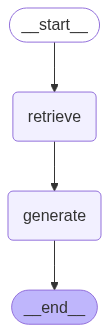

In [10]:
import os
from dotenv import load_dotenv
from modules.retriever import Retriever
from modules.grader import Grader
from modules.generator import Generator
from modules.rewriter import Rewriter
from modules.evaluator import Evaluator

from langgraph.graph import StateGraph, END

load_dotenv()
class PortfolioState(TypedDict):

    query: str

    retrieved: list

    score: float

    answer: str
# Load knowledge base
with open("data/knowledge_base.txt") as f:
    docs = f.readlines()

retriever = Retriever(docs)
grader = Grader()
generator = Generator()
rewriter = Rewriter()
evaluator = Evaluator()

def retrieve_node(state):
    query = state["query"]
    retrieved = retriever.retrieve(query)
    return {"query": query, "retrieved": retrieved}

def grade_node(state):
    score = grader.grade(state["retrieved"])
    return {"query": state["query"], "retrieved": state["retrieved"], "score": score}

def generate_node(state):
    answer = generator.generate(state["retrieved"], state["query"],generator)
    return {"query": state["query"], "retrieved": state["retrieved"], "score": state["score"], "answer": answer}

def evaluate_node(state):
    if evaluator.is_answered(state["answer"]):
        return END
    return "rewrite"

def rewrite_node(state):
    new_query = rewriter.rewrite(state["query"])
    return {"query": new_query}

# Build LangGraph
builder = StateGraph(PortfolioState)
builder.add_node("retrieve", retrieve_node)
#builder.add_node("grade", grade_node)
builder.add_node("generate", generate_node)
#builder.add_node("evaluate", evaluate_node)
#builder.add_node("rewrite", rewrite_node)

# builder.set_entry_point("retrieve")
# builder.add_edge("retrieve", "grade")
# builder.add_edge("grade", "generate")
# builder.add_edge("generate", "evaluate")
# builder.add_conditional_edges("evaluate", {"rewrite": "rewrite", END: END})
# builder.add_edge("rewrite", "retrieve")

builder.set_entry_point("retrieve")
builder.add_edge("retrieve", "generate")
builder.add_edge("generate", END)
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))
# Run the graph
# initial_state = {"query": "What are sustainable materials for facades?"}
# final_state = graph.invoke(initial_state)
# print("\n✅ Final Answer:")
# print(final_state["answer"])


✅ Loading cached FAISS vector store...


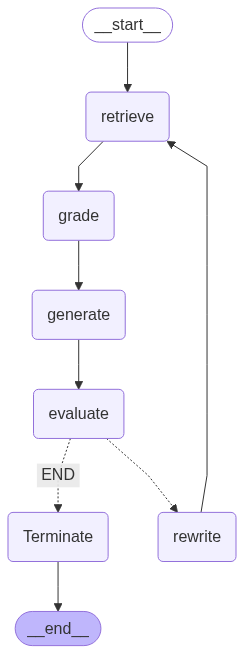

📘 Searching body sections...
✅ Retrieved 5 docs:
--- Result 1 ---
(x) the sum of (1) the Aggregate Principal Balance of the Underlying Assets and (2) the aggregate amount of any 
prepayment, redemption or maturity p ayments on Underlying A ssets that has not yet been reinvested in other 
Underlying Assets, is not less than the Effective Date Target Par Amount and 

--- Result 2 ---
of (I) the Effective Date Target Par Amount over (II) the amount of any reduction in the Aggregate Outstanding 
Amount of the Notes through the payment of Principal Proceeds and (2) the proceeds of the issuance of Additional 
Securities (if any) treated as Principal Proceeds.

--- Result 3 ---
Measurement Date occurs by (b) the amount (not less than zero) equal to (i) the Aggregate Principal Balance of the 
Underlying Assets (excluding any Defaulted Obligation and the unfunded portion of any Delayed-Draw Loan or of 
any Revolving Credit Facility) as of such date of determination, minus (i

The Effective Date

InvalidUpdateError: Expected dict, got __end__
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE

In [1]:
import os
from typing import TypedDict
from dotenv import load_dotenv
from modules.retriever import Retriever
from modules.grader import Grader
from modules.generator import Generator
from modules.rewriter import Rewriter
from modules.evaluator import Evaluator
from langchain_core.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph, END

load_dotenv()
class PortfolioState(TypedDict):

    query: str

    retrieved: list

    score: float

    answer: str
# Load knowledge base
with open("data/knowledge_base.txt") as f:
    docs = f.readlines()

# retriever = Retriever(docs)
retriever = Retriever()
grader = Grader()
prompt = ChatPromptTemplate.from_template("""
Answer the following question based only on the provided context. 
Think step by step before providing a detailed answer. 
I will tip you $1000 if the user finds the answer helpful. 
<context>
{context}
</context>
Question: {input}""")
generator = Generator(prompt)
rewriter = Rewriter()
evaluator = Evaluator()

def retrieve_node(state):
    query = state["query"]
    retrieved = retriever.retrieve(query)
    return {"query": query, "retrieved": retrieved}

def grade_node(state):
    score = grader.grade(state["retrieved"])
    return {"query": state["query"], "retrieved": state["retrieved"], "score": score}

def generate_node(state):
    answer = generator.generate(state["retrieved"], state["query"])
    print(answer)
    return {"query": state["query"], "retrieved": state["retrieved"], "score": state["score"], "answer": answer}

def evaluate_node(state):
    if evaluator.is_answered(state["answer"]):
        return END
    return "rewrite"

def rewrite_node(state):
    new_query = rewriter.rewrite(state["query"])
    return {"query": new_query}
def termination_node(state):
    print("\nFinal Answer:")
    print(state["answer"])
    return state

# Build LangGraph
builder = StateGraph(PortfolioState)
builder.add_node("retrieve", retrieve_node)
builder.add_node("grade", grade_node)
builder.add_node("generate", generate_node)
builder.add_node("evaluate", evaluate_node)
builder.add_node("rewrite", rewrite_node)
builder.add_node("Terminate", termination_node)
builder.set_entry_point("retrieve")
builder.add_edge("retrieve", "grade")
builder.add_edge("grade", "generate")
builder.add_edge("generate", "evaluate")

builder.add_conditional_edges("evaluate",evaluate_node, 
                              {"rewrite": "rewrite", "END": "Terminate"}
                            )
builder.add_edge("rewrite", "retrieve")
builder.add_edge("Terminate", END)
# builder.set_entry_point("retrieve")
# builder.add_edge("retrieve", "generate")
# builder.add_edge("generate", END)
graph = builder.compile()
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))
initial_state = {
    "query": "Look for Target Par Amount/Effective date par amount/Aggregate par amount",
    "retrieved": [],
    "score": 0.0,
    "answer": ""}
final_state = graph.invoke(initial_state)
print("\n✅ Final Answer:")
print(final_state["answer"])